## Random Sample Imputation

Random sample imputation it consist of taking random observation from dataset and we use this observation to replace null value

when should it be used ?
it assumes data are missing completely at random

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Titanic.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isna().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
 ramdom_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0).index

In [8]:
random_sample=df[df['Age'].isnull()].index

In [9]:
random_sample

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [10]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [11]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [12]:
median=df['Age'].median()

In [13]:
median

28.0

In [14]:
impute_nan(df,'Age',median)

In [15]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

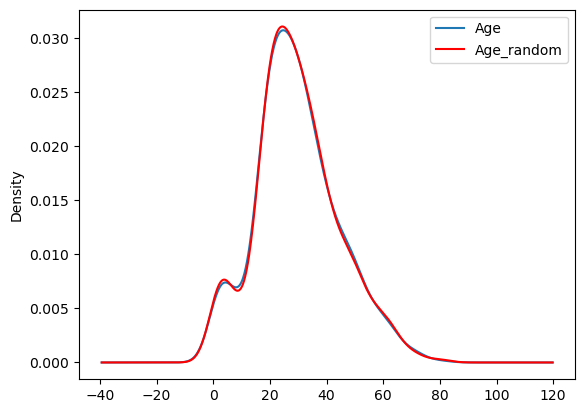

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Advantages
#### Easy to implement
#### Less distortion in variance
## Disadvantage
1. In Every situation random does not work


### Cpturing NAN values with a new features

###### It works well when the data is missing not completely at random

In [19]:
df=pd.read_csv("Titanic.csv",usecols=['Age','Fare','Survived'])

In [20]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
import numpy as np

In [22]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [23]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [24]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [25]:
df.Age.median()

28.0

In [26]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantage
1. Easy to implement
2. Capture importance of missing values

## Disadvantages
1.Creating Additional Features(Curse of Dimensionality)

## End of Distribution Imputation

In [27]:
df=pd.read_csv("Titanic.csv",usecols=['Age','Survived'])

In [28]:
df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


<AxesSubplot:>

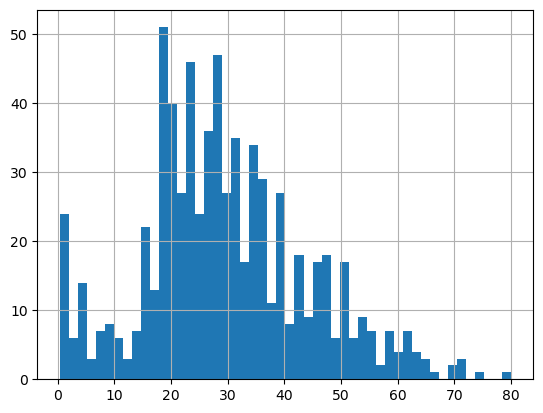

In [29]:
df.Age.hist(bins=50)

In [30]:
extreme=df.Age.mean()+3*df.Age.std()

In [31]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

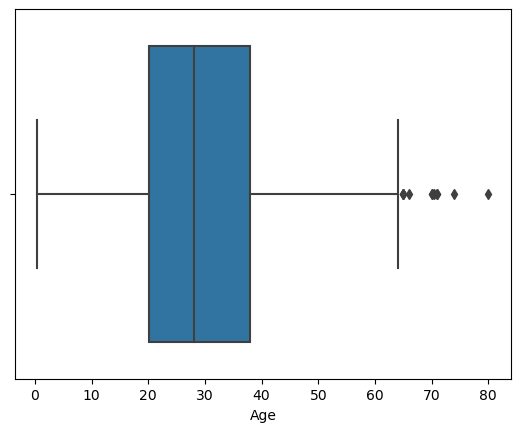

In [32]:
sns.boxplot(df.Age,data=df)

In [33]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [34]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [35]:
df.head()

,Survived,Age,Age_end_distribution
0,0,22.0,22.0
1,1,38.0,38.0
2,1,26.0,26.0
3,1,35.0,35.0
4,0,35.0,35.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

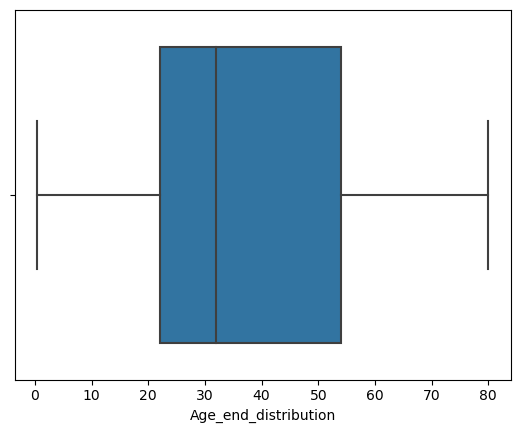

In [36]:
sns.boxplot(df.Age_end_distribution,data=df)